In [247]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

In [248]:
# custom library
import useful_functions
# useful for when you need to reload your library without reloading the entire notebook
reload(useful_functions)

<module 'useful_functions' from 'c:\\Users\\angel\\OneDrive\\Desktop\\ECE_4850_Machine_Learning\\ECE-4850-Machine-Learning\\project4\\useful_functions.py'>

In [249]:
x0_class0, x1_class0, x0_class1, x1_class1 = np.loadtxt('classasgntrain1.dat').T
data_x0 = np.concatenate((x0_class0, x0_class1))
data_x1 = np.concatenate((x1_class0, x1_class1))
data_y_class0 = np.concatenate((np.ones(x0_class0.size), np.zeros(x0_class1.size)))
data_y_class1 = np.concatenate((np.zeros(x1_class0.size), np.ones(x1_class1.size)))
data = np.asanyarray((data_x0, data_x1, data_y_class0, data_y_class1))
print(f'This is x0 array: \n{data[0]}')
print()
print(f'This is x1 array: \n{data[1]}')
print()
print(f'This states if a point is in class 0: \n{data[2]}')
print()
print(f'This states if a point is in class 1: \n{data[3]}')
print()

This is x0 array: 
[ 0.5364  1.044   0.6646  1.6022 -0.6463  1.6813  3.4658 -0.3678  1.5382
  1.7227  1.985   0.4627  3.304   2.0612  2.9284  3.5647  3.0219  0.8157
  4.1266  0.5339 -0.6916  3.3052  3.7177  3.0084  2.4651 -0.33    2.2648
  0.7884  2.1944  0.3084  2.8847 -0.2177 -0.5453  0.1466  2.1405 -1.1063
  1.7957  1.2054 -0.8116 -1.2637 -0.1458  0.0521  1.8661  1.0862  0.6089
  3.0669  3.445  -0.3663 -0.6196  0.0949  1.9963  1.0631 -0.2911  1.5544
  0.4818  0.2334 -0.0764  0.0928  0.6352  3.7316  1.1341  4.2796  1.805
  1.993   1.4409  1.6003 -1.0116 -0.9765  1.2194  1.8265  1.6406  0.3619
  1.7522  1.3861  2.7766  2.1086  1.2134 -0.0797  2.1316 -0.9544  0.2657
 -1.1966  1.016   3.5862  4.6887  0.3536  0.5118  0.2368 -1.1131 -0.0962
 -0.1009  2.6252 -0.8228 -0.7261  0.2724  1.2832  1.2111  0.2464  1.1859
 -0.4559  0.6983  1.2534 -0.0284 -0.7349 -1.0773  0.9719  0.5375  2.451
  0.9435 -1.5079 -0.5036 -1.3641  1.5019  0.5274 -0.8851  1.9917  0.3774
  0.0681  0.8296  0.2667  0.389  -

In [250]:
random0_class0, random1_class0, random0_class1, random1_class1 = np.loadtxt('outputFile.dat').T
random_x0 = np.concatenate((random0_class0, random0_class1))
random_x1 = np.concatenate((random1_class0, random1_class1))
random_y_class0 = np.concatenate((np.ones(random0_class0.size), np.zeros(random0_class1.size)))
random_y_class1 = np.concatenate((np.zeros(random1_class0.size), np.ones(random1_class1.size)))
random_data = np.asanyarray((random_x0, random_x1, random_y_class0, random_y_class1))
print(f'This is random_x0 array: \n{random_data[0]}')
print()
print(f'This is random_x1 array: \n{random_data[1]}')
print()
print(f'This states if a point is in class 0: \n{random_data[2]}')
print()
print(f'This states if a point is in class 1: \n{random_data[3]}')
print()

This is random_x0 array: 
[ 2.5689   0.88525  2.3657  ... -1.0755  -1.337    1.9775 ]

This is random_x1 array: 
[0.10318  0.4179   2.0423   ... 0.20494  0.016222 0.34298 ]

This states if a point is in class 0: 
[1. 1. 1. ... 0. 0. 0.]

This states if a point is in class 1: 
[0. 0. 0. ... 1. 1. 1.]



In [251]:
# fig = useful_functions.DrawOneDataset(data, 'x', 'o', 'green', 'red', 'Class 0', 'Class 1', "Sample Population")
# fig.run_drawing()

In [252]:
# linear regression function from project 1
# NOTE: this didn't work on windows maybe
def linear_regression(x0, x1, y):
    '''x (numpy.ndarray): x-coordinates of training data
    y (numpy.ndarray): y-coordinates of training data'''
    X_aug = np.stack((np.ones(x0.size), x0, x1), axis=1)
    Beta = np.dot(np.dot(np.linalg.pinv(np.dot(X_aug.T, X_aug)), X_aug.T), y)
    return Beta

# gestimating an output given an input and a linear regression
# NOTE: this didn't work on windows maybe
def least_squares_est(x0, x1, beta):
    '''x (numpy.ndarray): x-coordinate which we want a prediction value for based on the model of beta
    y_hat (numpy.ndarray): y-coordinate predictions based on given inputs x'''
    X_aug = np.stack((np.ones(x0.size), x0, x1), axis=1)
    y_hat = np.dot(X_aug, beta)
    return y_hat

In [253]:
def gen_2D_array(N, upper, lower):
    x_extended0 = np.array([])
    for i in range(N):
        x_extended0 = np.append(x_extended0, np.linspace(lower, upper, N))
    x_extended1 = np.array([])
    for i in np.linspace(lower, upper, N):
        x_extended1 = np.append(x_extended1, np.repeat(i, N))

    return x_extended0, x_extended1

In [254]:
x_extended0, x_extended1 = gen_2D_array(100, -5, 5)
x_extended = np.vstack((x_extended0, x_extended1))

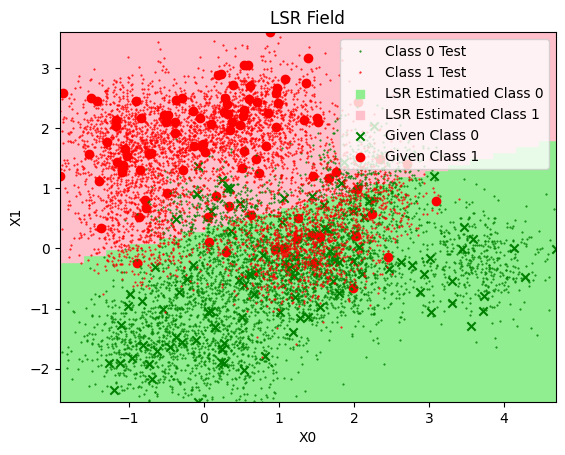

In [255]:
beta0 = linear_regression(data[0], data[1], data[2])
beta1 = linear_regression(data[0], data[1], data[3])

y0_hat = least_squares_est(x_extended0, x_extended1, beta0)
y1_hat = least_squares_est(x_extended0, x_extended1, beta1)
data_hat = np.vstack((x_extended0, x_extended1, y0_hat, y1_hat))

fig = useful_functions.DrawTwoDataset(data_hat, data, ',', ',', 'o', 'o',
                                    'lightgreen', 'pink', 'green', 'red',
                                    'LSR Estimatied Class 0', 'LSR Estimated Class 1', 'Given Class 0', 'Given Class 1', "LSR Field")
fig.run_drawing()

Error rate of LSR on Given Data: 0.145


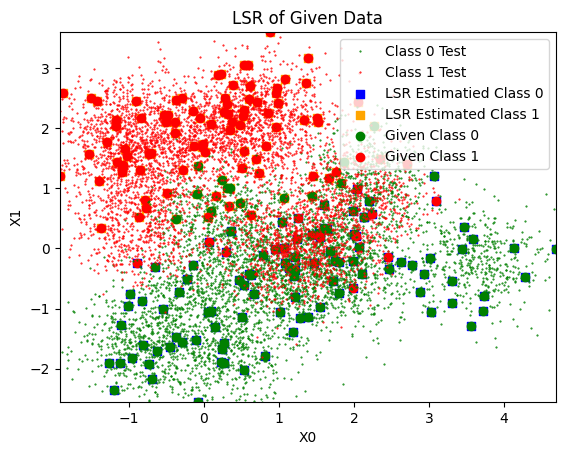

In [265]:
y0_hat = least_squares_est(data[0], data[1], beta0)
y1_hat = least_squares_est(data[0], data[1], beta1)
data_hat = np.vstack((data[0], data[1], y0_hat, y1_hat))

value_vector = np.array([])
for i in range(data_hat[3].size):
    if data_hat[3][i] > 0.5:
        value_vector = np.append(value_vector, 1)
    else:
        value_vector = np.append(value_vector, 0)

error_rate = np.sum(np.abs(value_vector - data[3])) / data[3].size
print(f'Error rate of LSR on Given Data: {error_rate}')

fig = useful_functions.DrawTwoDataset(data_hat, data, 's', 's', '.', '.',
                                    'blue', 'orange', 'green', 'red',
                                    'LSR Estimatied Class 0', 'LSR Estimated Class 1', 'Given Class 0', 'Given Class 1', "LSR of Given Data")
fig.run_drawing()

Error rate of LSR on Random Data: 0.2061


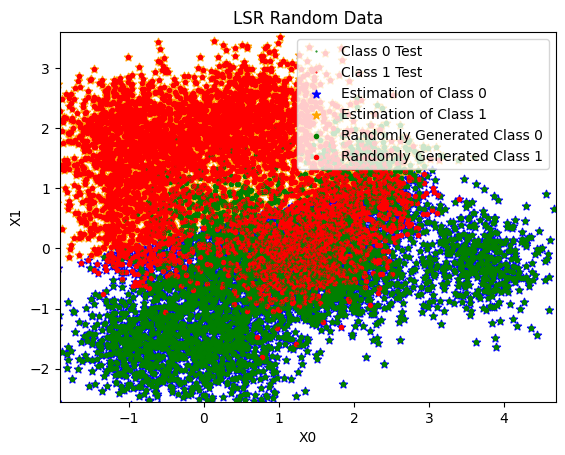

In [257]:
random0_hat = least_squares_est(random_data[0], random_data[1], beta0)
random1_hat = least_squares_est(random_data[0], random_data[1], beta1)
random_guess = np.vstack((random_data[0], random_data[1], random0_hat, random1_hat))

value_vector = np.array([])
for i in range(random_guess[3].size):
    if random_guess[3][i] > 0.5:
        value_vector = np.append(value_vector, 1)
    else:
        value_vector = np.append(value_vector, 0)

error_rate = np.sum(np.abs(value_vector - random_data[3])) / random_data[3].size
print(f'Error rate of LSR on Random Data: {error_rate}')

fig = useful_functions.DrawTwoDataset(random_guess, random_data, '*', '*', '.', '.',
                                    'blue', 'orange', 'green', 'red',
                                    'Estimation of Class 0', 'Estimation of Class 1', 'Randomly Generated Class 0', 'Randomly Generated Class 1', "LSR Random Data")
fig.run_drawing()

In [258]:
# quadratic regression function from project 1
# NOTE: this didn't work on windows maybe
def quadratic_regression(x0, x1, y):
    '''x (numpy.ndarray): x-coordinates of training data
    y (numpy.ndarray): y-coordinates of training data'''
    X_aug = np.stack((np.ones(x0.size), x0, x0**2, x1, x1**2, x0*x1), axis=1)
    Beta = np.dot(np.dot(np.linalg.pinv(np.dot(X_aug.T, X_aug)), X_aug.T), y)
    return Beta

# gestimating an output given an input and a quadratic regression
# NOTE: this didn't work on windows maybe
def quad_least_squares_est(x0, x1, beta):
    '''x (numpy.ndarray): x-coordinate which we want a prediction value for based on the model of beta
    y_hat (numpy.ndarray): y-coordinate predictions based on given inputs x'''
    X_aug = np.stack((np.ones(x0.size), x0, x0**2, x1, x1**2, x0*x1), axis=1)
    y_hat = np.dot(X_aug, beta)
    return y_hat

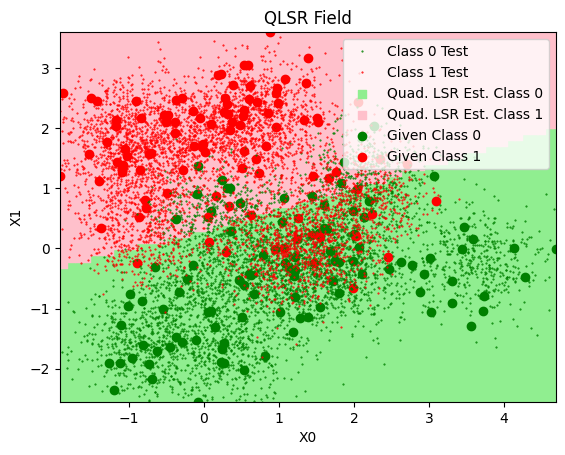

In [259]:
qbeta0 = quadratic_regression(data[0], data[1], data[2])
qbeta1 = quadratic_regression(data[0], data[1], data[3])

y0_hat = quad_least_squares_est(x_extended0, x_extended1, qbeta0)
y1_hat = quad_least_squares_est(x_extended0, x_extended1, qbeta1)
data_hat = np.vstack((x_extended0, x_extended1, y0_hat, y1_hat))

fig = useful_functions.DrawTwoDataset(data_hat, data, ',', ',', 'o', 'o',
                                    'lightgreen', 'pink', 'green', 'red',
                                    'Quad. LSR Est. Class 0', 'Quad. LSR Est. Class 1', 'Given Class 0', 'Given Class 1', "QLSR Field")
fig.run_drawing()

Error rate of LSR on Given Data: 0.145


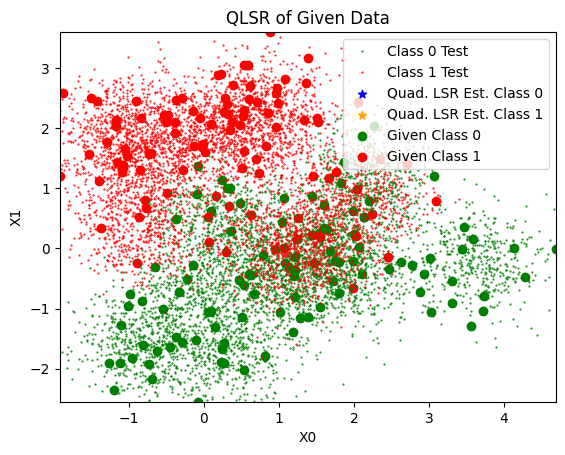

In [260]:
y0_hat = quad_least_squares_est(data[0], data[1], qbeta0)
y1_hat = quad_least_squares_est(data[0], data[1], qbeta1)
data_hat = np.vstack((data[0], data[1], y0_hat, y1_hat))

value_vector = np.array([])
for i in range(data_hat[3].size):
    if data_hat[3][i] > 0.5:
        value_vector = np.append(value_vector, 1)
    else:
        value_vector = np.append(value_vector, 0)

error_rate = np.sum(np.abs(value_vector - data[3])) / data[3].size
print(f'Error rate of LSR on Given Data: {error_rate}')

fig = useful_functions.DrawTwoDataset(data_hat, data, '*', '*', 'o', 'o',
                                    'blue', 'orange', 'green', 'red',
                                    'Quad. LSR Est. Class 0', 'Quad. LSR Est. Class 1', 'Given Class 0', 'Given Class 1', "QLSR of Given Data")
fig.run_drawing()

Error rate of LSR on Random Data: 0.2053


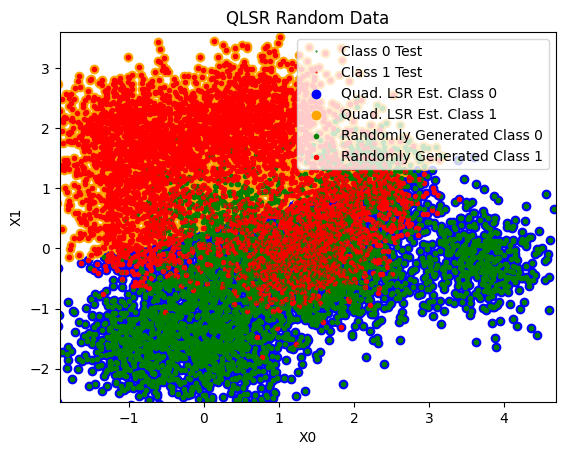

In [261]:
random0_hat = quad_least_squares_est(random_data[0], random_data[1], qbeta0)
random1_hat = quad_least_squares_est(random_data[0], random_data[1], qbeta1)
random_guess = np.vstack((random_data[0], random_data[1], random0_hat, random1_hat))

value_vector = np.array([])
for i in range(random_guess[3].size):
    if random_guess[3][i] > 0.5:
        value_vector = np.append(value_vector, 1)
    else:
        value_vector = np.append(value_vector, 0)

error_rate = np.sum(np.abs(value_vector - random_data[3])) / random_data[3].size
print(f'Error rate of LSR on Random Data: {error_rate}')

fig = useful_functions.DrawTwoDataset(random_guess, random_data, 'o', 'o', '.', '.',
                                    'blue', 'orange', 'green', 'red',
                                    'Quad. LSR Est. Class 0', 'Quad. LSR Est. Class 1', 'Randomly Generated Class 0', 'Randomly Generated Class 1', "QLSR Random Data")
fig.run_drawing()

In [262]:
def get_distance(x1,y1,x2,y2):
    """x1/y1 correspond to first coordinate
    and x2/y2 correspond to second coordinate"""
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

def nearest_neighbor_var(unknown, known, num_nearest):
    if num_nearest >= known[0].size:
        raise ValueError('The order of nearest neighbor must be less than the number of known points')
    output_array = np.zeros(unknown[0].size)
    temp_data = np.vstack((np.zeros(known[0].size), np.zeros(known[0].size)))
    for j in range(unknown[0].size):
        for i in range(known[0].size):
            temp_data[0][i] = get_distance(known[0][i], known[1][i], unknown[0][j], unknown[1][j])
            temp_data[1][i] = known[3][i]
        largest_distancex2 = 2*temp_data[0][np.argmax(temp_data[0])]
        for z in range(num_nearest):
            min_position = np.argmin(temp_data[0])
            output_array[j] += temp_data[1][min_position]
            temp_data[0][min_position] = largest_distancex2
        
    output_array = output_array / num_nearest
    
    return output_array

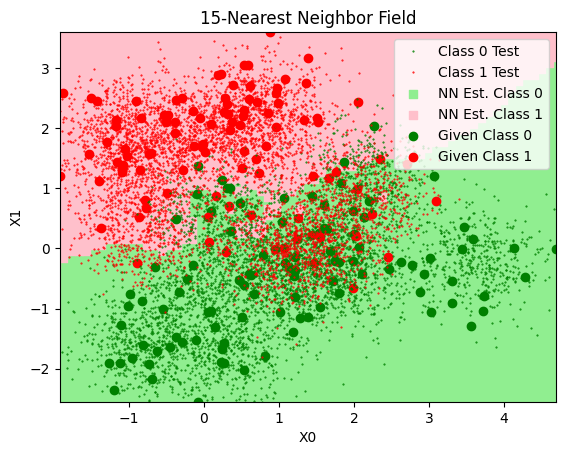

In [263]:
nearest_neighbor_count = 15
output_array = nearest_neighbor_var(x_extended, data, nearest_neighbor_count)
data_hat = np.vstack((x_extended, np.abs(output_array-1), output_array))

fig = useful_functions.DrawTwoDataset(data_hat, data, ',', ',', 'o', 'o',
                                    'lightgreen', 'pink', 'green', 'red',
                                    'NN Est. Class 0', 'NN Est. Class 1', 'Given Class 0', 'Given Class 1', f"{nearest_neighbor_count}-Nearest Neighbor Field")
fig.run_drawing()

Error rate of 15-NN on Random Data: 0.1958


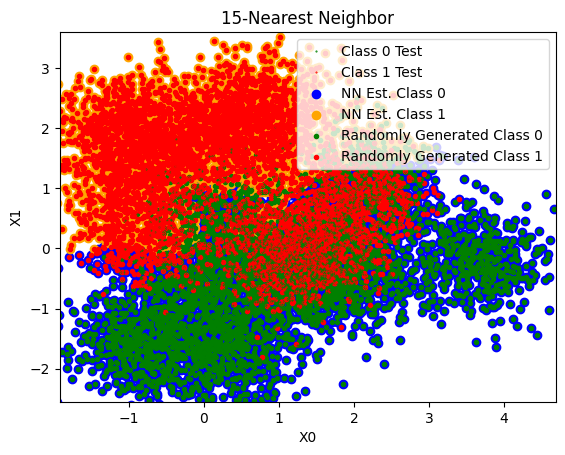

In [264]:
nearest_neighbor_count = 15
output_array = nearest_neighbor_var(random_data, data, nearest_neighbor_count)
data_hat = np.vstack((random_data[0], random_data[1], 1-output_array, output_array))

error_rate = np.sum(np.abs(np.round(data_hat[3]) - random_data[3])) / random_data[3].size
print(f'Error rate of {nearest_neighbor_count}-NN on Random Data: {error_rate}')

fig = useful_functions.DrawTwoDataset(data_hat, random_data, 'o', 'o', '.', '.',
                                    'blue', 'orange', 'green', 'red',
                                    'NN Est. Class 0', 'NN Est. Class 1', 'Randomly Generated Class 0', 'Randomly Generated Class 1', f"{nearest_neighbor_count}-Nearest Neighbor")
fig.run_drawing()